In [1]:
#!pip install pandas
#!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in data
data = pd.read_csv("framingham.csv")
print("Data : " + str(data.shape))

Data : (3656, 16)


In [4]:
#data = data.rename(columns={'male': 'gender'})

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#Check data type
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
#Check missing values
print(data.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [8]:
#Checking duplicates
print(data[data.duplicated()])

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


This dataset is already cleaned.

In [9]:
summary = data.describe()
print(summary)

              male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   

In [10]:
#plt.figure(figsize=(22,15))
#sns.boxplot(data)
#plt.show()

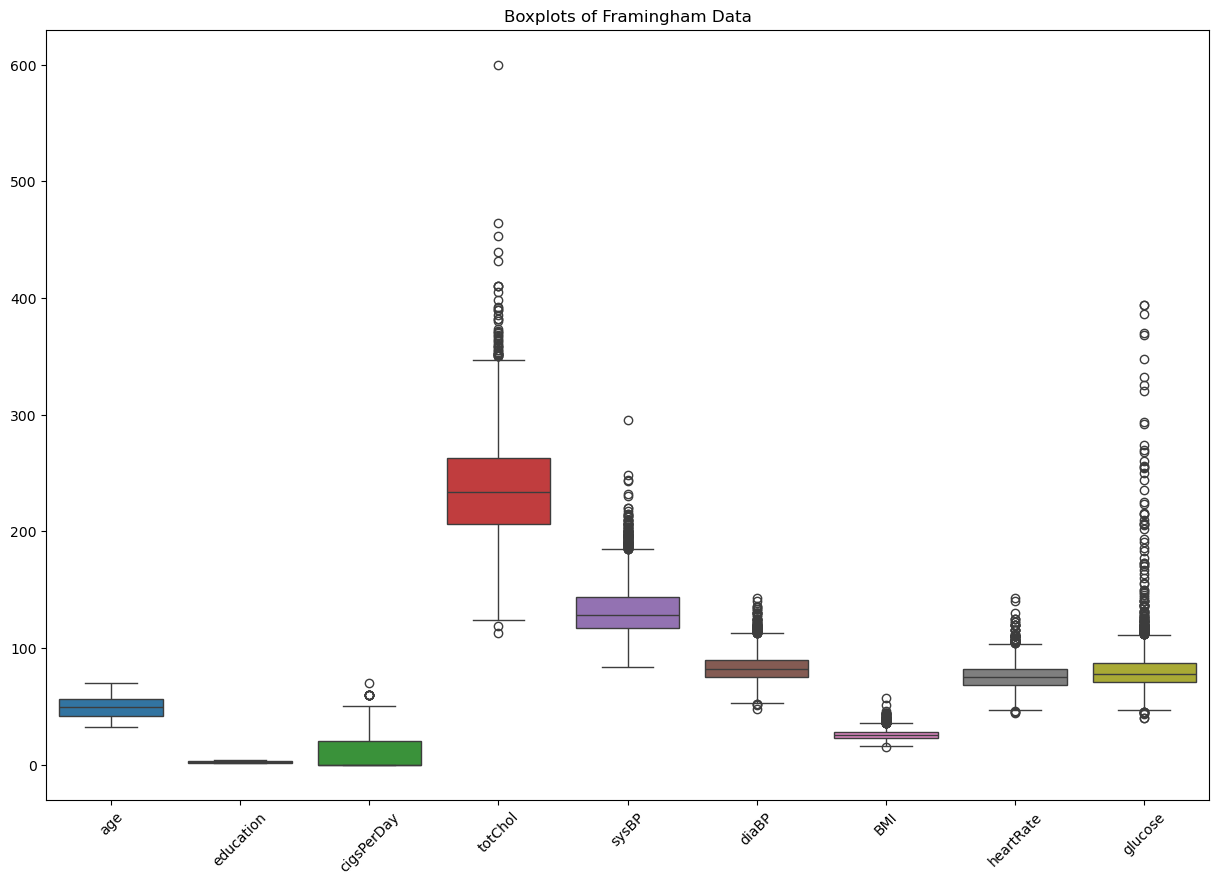

In [11]:
# Drop specified columns
columns_to_drop = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
data_new = data.drop(columns=columns_to_drop)

# Create boxplots for the remaining columns
plt.figure(figsize=(15, 10))
sns.boxplot(data_new)
plt.xticks(rotation=45)
plt.title('Boxplots of Framingham Data')
plt.show()

In [12]:
#observe outlier that is far away
print(data_new['totChol'].max())
print(data_new['sysBP'].max())

600.0
295.0


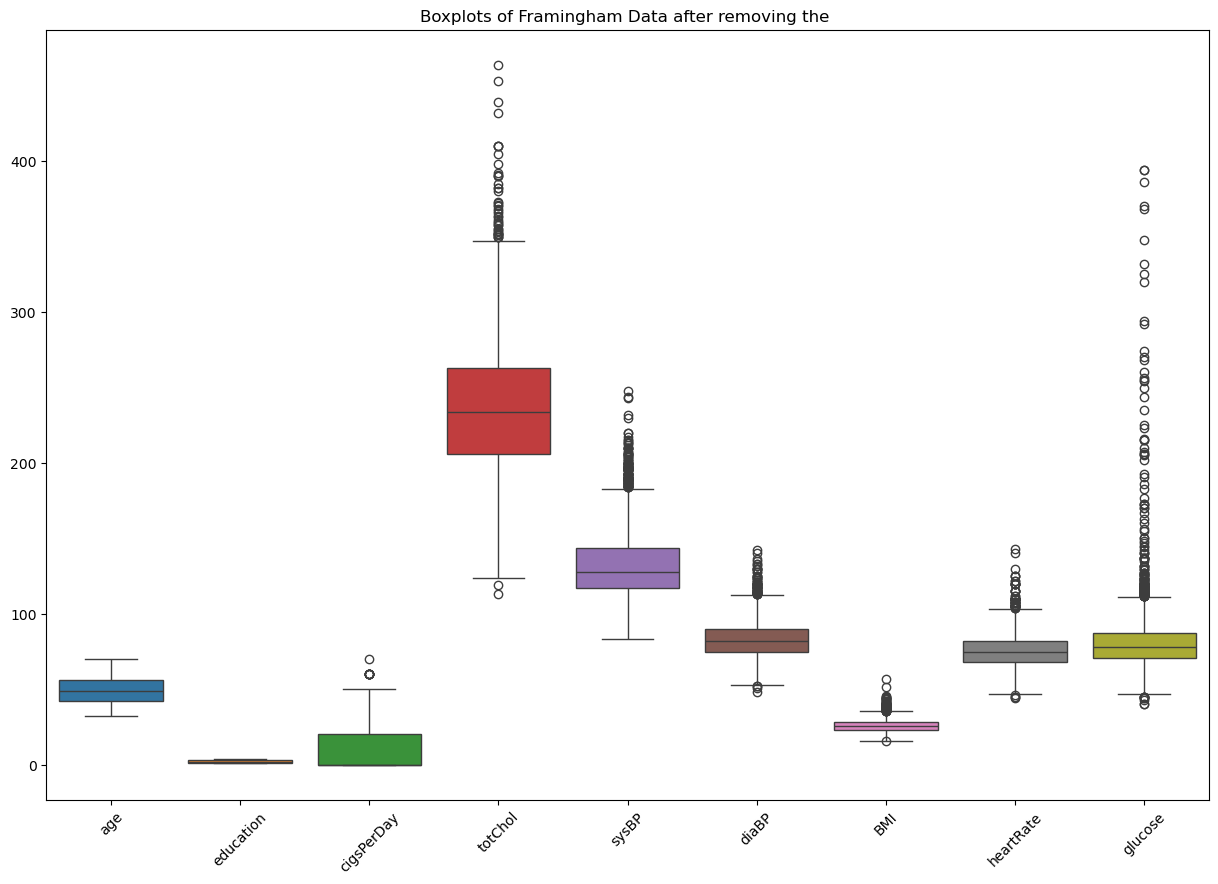

In [17]:
#remove outlier
data_cleaned = data_new[(data_new['totChol'] < 600.0) & (data_new['sysBP'] < 295.0)]

plt.figure(figsize=(15, 10))
sns.boxplot(data_cleaned)
plt.xticks(rotation=45)
plt.title('Boxplots of Framingham Data after removing the ')
plt.show()

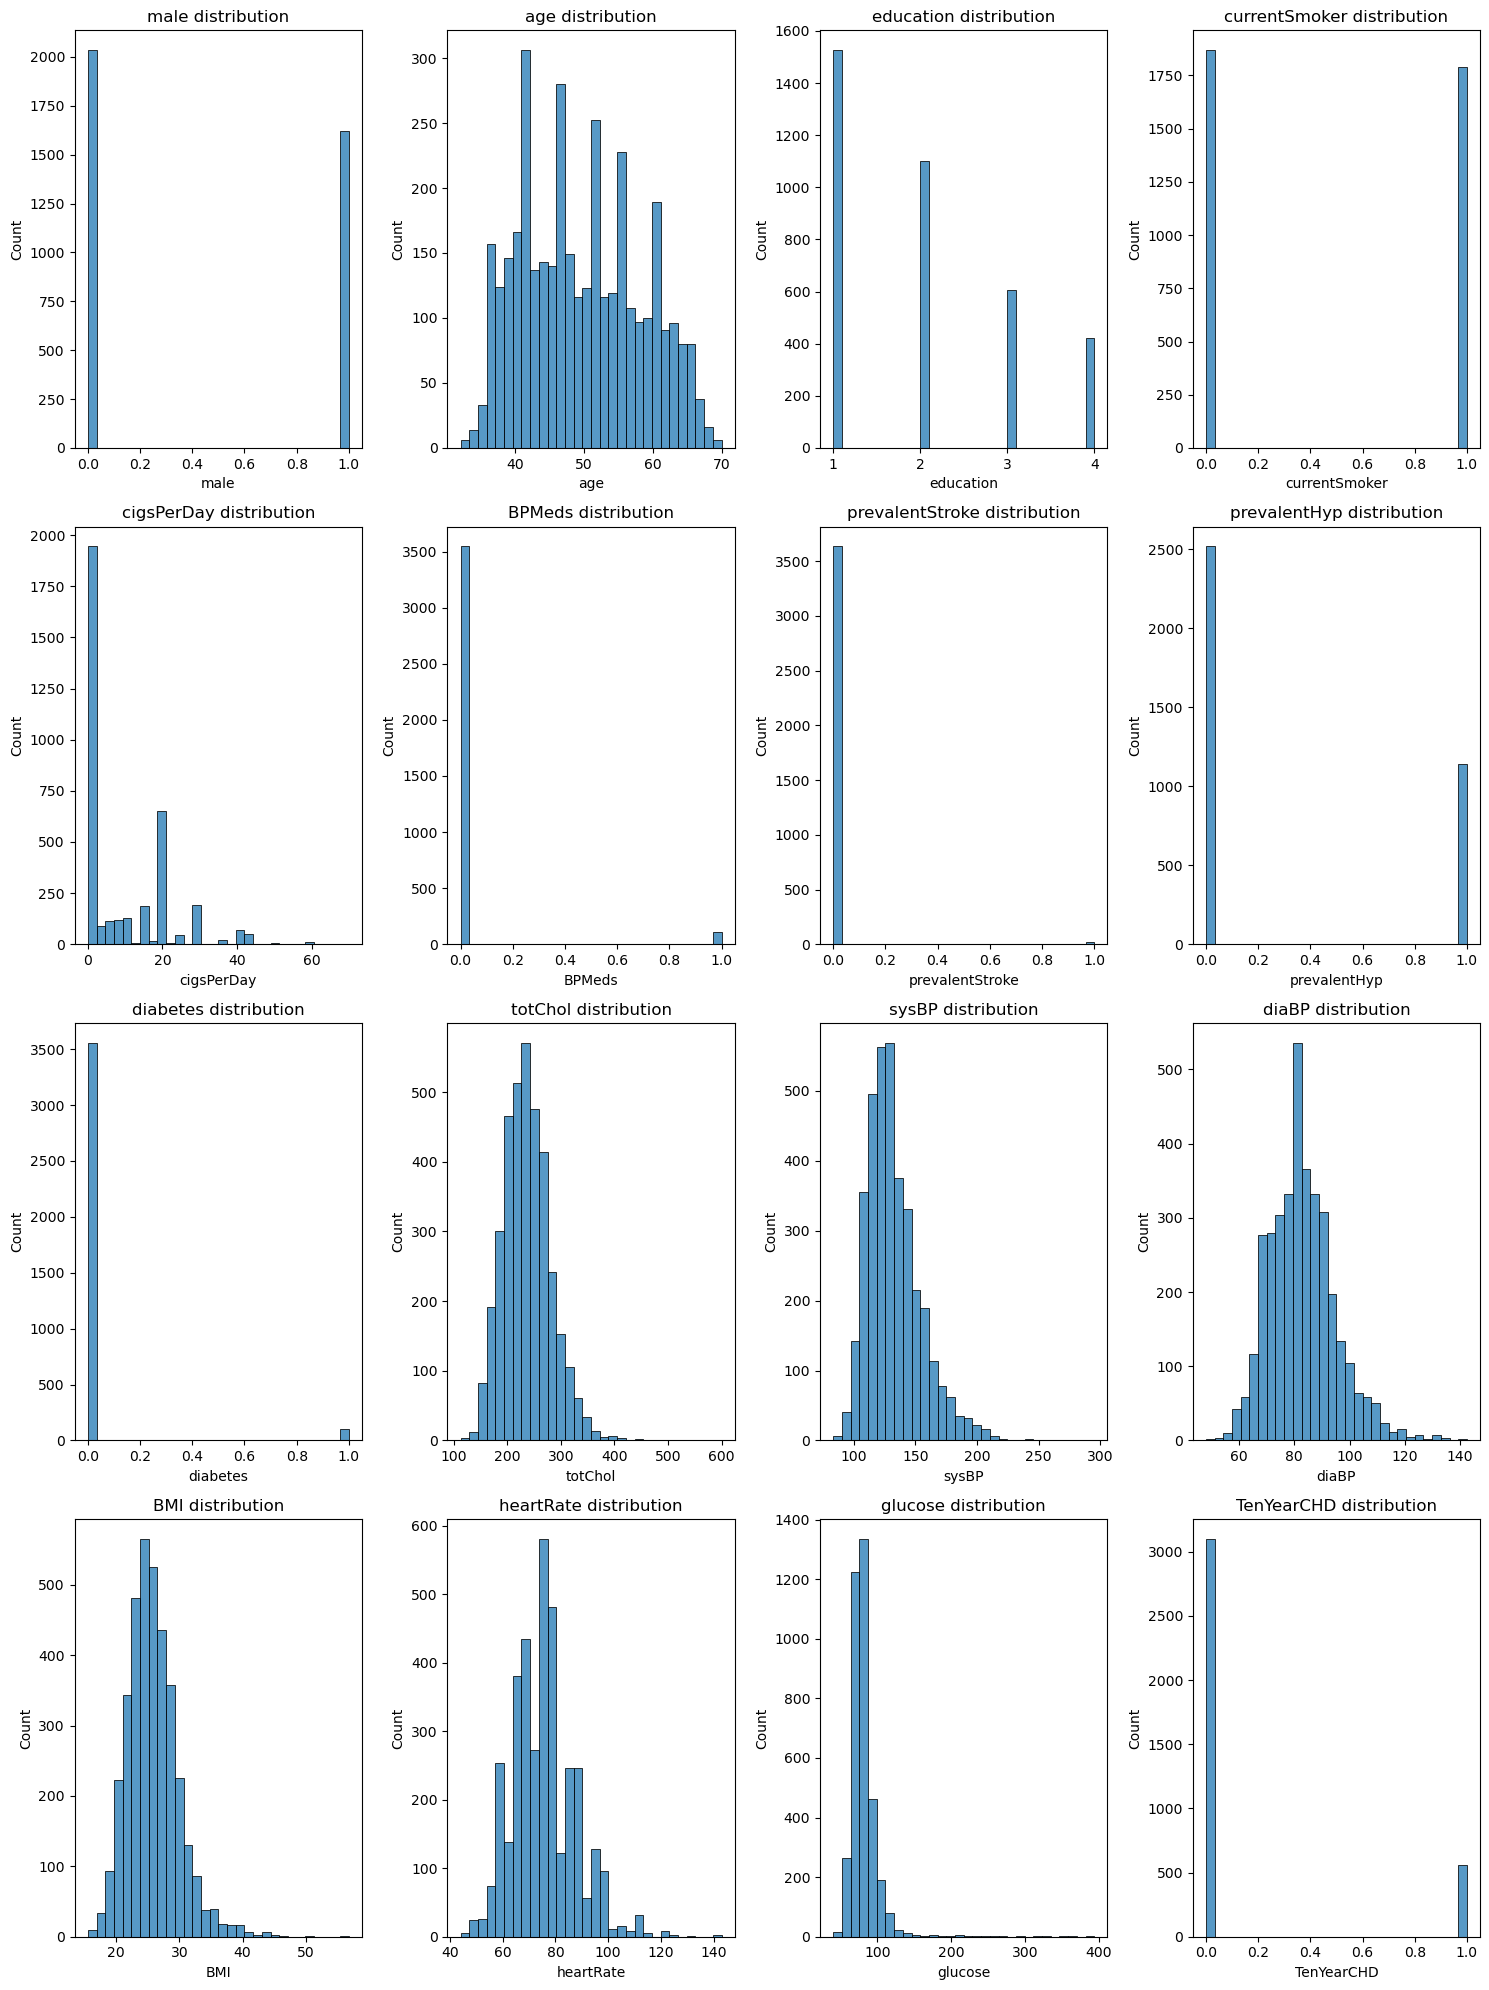

In [19]:
# we only have numeric data here, so we do not consider the categorical p

numerical_columns = data.columns

#make 4 plots each row
n_cols = 4 
n_rows = 4

plt.figure(figsize=(15, 5 * n_rows))

#plot the histograms for each variable
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data[column], bins=30)
    plt.title(column + ' distribution')

plt.tight_layout()
plt.show()

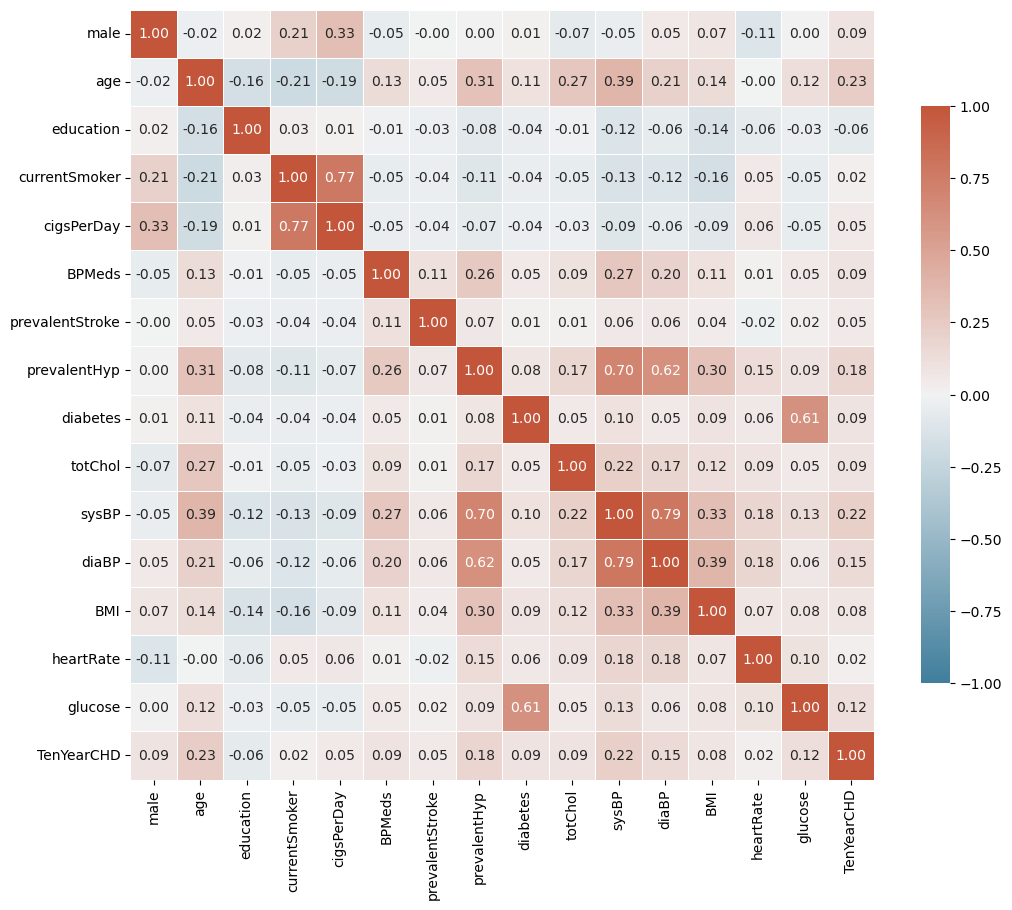

In [20]:
correlation = data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, annot=True, fmt=".2f", cmap=cmap, cbar_kws={"shrink": .75}, vmin=-1, vmax=1, center=0, linewidths=.5)

# Show the plot
plt.show()

From the heat map above, we can observe that the variable education is negative correlated with the TenYearCHD, which is not important to our research goal, we could ignore this variable.

In [22]:
data1 = data.drop(columns=['education'])
data1.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
sns.pairplot(data1, hue='TenYearCHD')

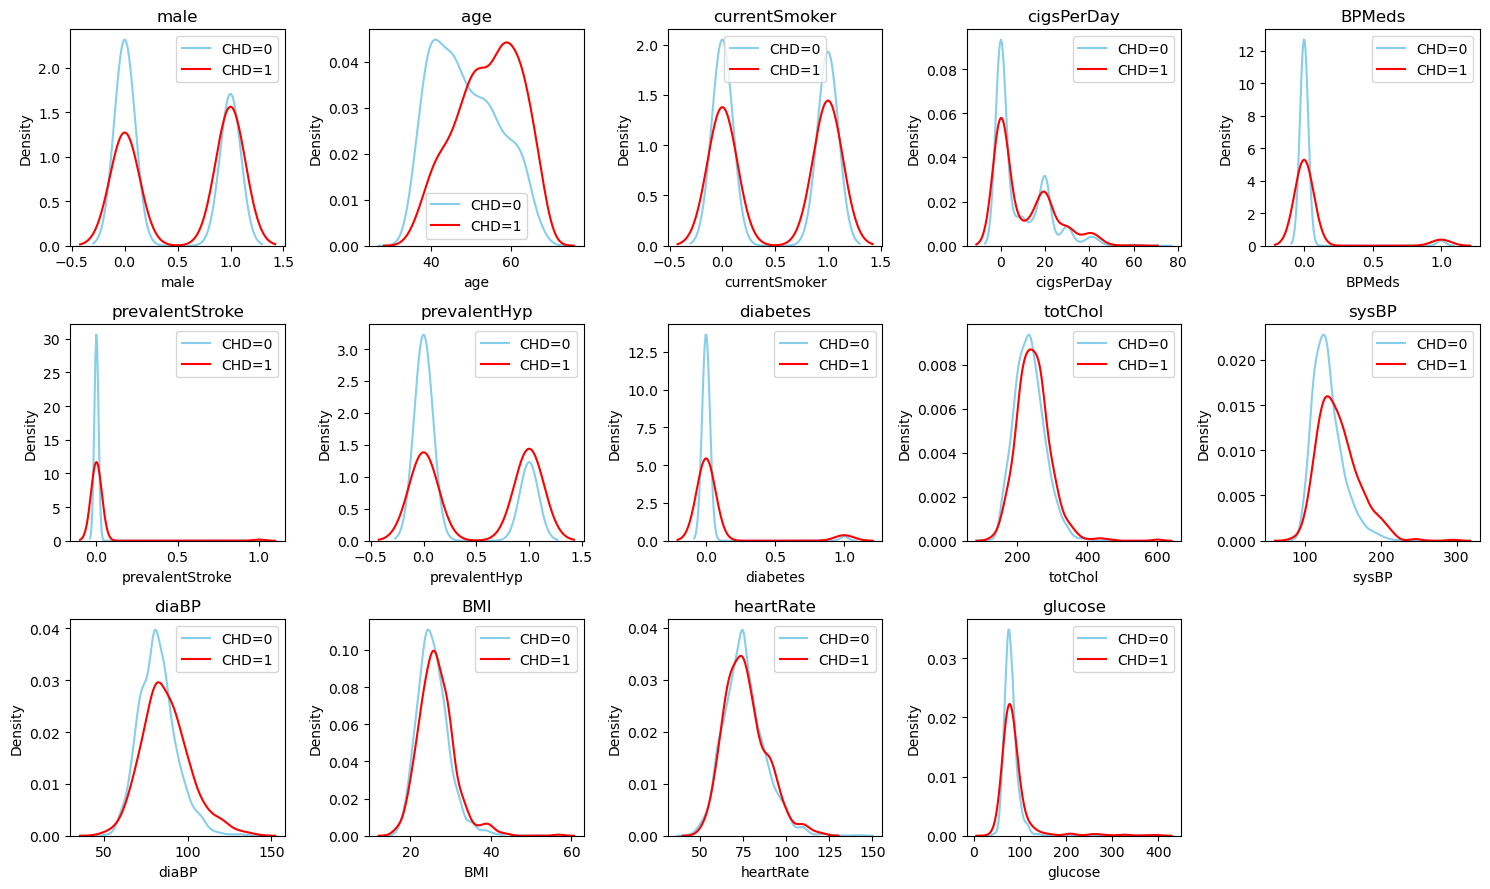

In [36]:
independent_vars = [col for col in data1.columns if col != 'TenYearCHD']

n_cols = 5  # corrected variable name
n_rows = int(len(independent_vars) / n_cols) + (len(independent_vars) % n_cols > 0)

plt.figure(figsize=(15, 3*n_rows))

for i, var in enumerate(independent_vars, start=1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create a KDE plot for cases where TenYearCHD is 0
    sns.kdeplot(data1[data1['TenYearCHD'] == 0][var], color='skyblue', label='CHD=0')
    
    # Create a KDE plot for cases where TenYearCHD is 1
    sns.kdeplot(data1[data1['TenYearCHD'] == 1][var], color='red', label='CHD=1')
    
    # Set the title
    plt.title(var)
    plt.legend()

plt.tight_layout()
plt.show()